<h1 align=center>Seattle Road Collisions Project</h1>

 Each year around 20-30 Million people get into a road accident in which around
10% of those lose their lives. Road accidents are a serious shame for our society and still we are
not in a state to reduce it. Most of the innocent casualties are of the pedestrians , cyclists and the
bikers and between the age of 20-35 yrs, the future of any country and the solo earners of a
family.
<br><br>
So can we make a model to predict the severity of an accident using the basic data of weather, road and other data. This project is  based on a data from Seattle road accident from year 2004-
<br>

##### let's get started


In [1]:
#firstly, let's import the basic data libraries

import pandas as pd
import numpy as np

this data file is a .csv file, lets import it now

## Load Data From CSV File

In [2]:
df= pd.read_csv('Data-Collisions.csv')

C:\Users\vinit\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head() #lets see first 5 rows of ouw data

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


## Data visualization and pre-processing

In [4]:
df.describe(include='all')

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
count,194673.000000,189339.000000,189339.000000,194673.000000,194673.000000,194673.000000,194673,194673,192747,65070.000000,...,189661,189503,4667,1.149360e+05,9333,194655,189769,194673.000000,1.946730e+05,194673
unique,NaN,NaN,NaN,NaN,NaN,NaN,194670,2,3,NaN,...,9,9,1,NaN,1,115,62,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,1782439,Matched,Block,NaN,...,Dry,Daylight,Y,NaN,Y,32,One parked--one moving,NaN,NaN,N
freq,NaN,NaN,NaN,NaN,NaN,NaN,2,189786,126926,NaN,...,124510,116137,4667,NaN,9333,27612,44421,NaN,NaN,187457
mean,1.298901,-122.330518,47.619543,108479.364930,141091.456350,141298.811381,NaN,NaN,NaN,37558.450576,...,NaN,NaN,NaN,7.972521e+06,NaN,NaN,NaN,269.401114,9.782452e+03,NaN
std,0.457778,0.029976,0.056157,62649.722558,86634.402737,86986.542110,NaN,NaN,NaN,51745.990273,...,NaN,NaN,NaN,2.553533e+06,NaN,NaN,NaN,3315.776055,7.226926e+04,NaN
min,1.000000,-122.419091,47.495573,1.000000,1001.000000,1001.000000,NaN,NaN,NaN,23807.000000,...,NaN,NaN,NaN,1.007024e+06,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
25%,1.000000,-122.348673,47.575956,54267.000000,70383.000000,70383.000000,NaN,NaN,NaN,28667.000000,...,NaN,NaN,NaN,6.040015e+06,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
50%,1.000000,-122.330224,47.615369,106912.000000,123363.000000,123363.000000,NaN,NaN,NaN,29973.000000,...,NaN,NaN,NaN,8.023022e+06,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
75%,2.000000,-122.311937,47.663664,162272.000000,203319.000000,203459.000000,NaN,NaN,NaN,33973.000000,...,NaN,NaN,NaN,1.015501e+07,NaN,NaN,NaN,0.000000,0.000000e+00,NaN


In [5]:
df.shape

(194673, 38)

In [6]:
df.dtypes

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

## Analysing data

In [7]:
#the data we have to predict is 'severitycode'

df['SEVERITYCODE'].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

**what severity code means--------------->**

| code | Severity |
|------|----------|
|  0   |  unknown |
|  1   |serious damage|
|  2   |  injury  |
|  2b  |serious injury|
|  3   | fatality |

In [8]:
#checking nan values in each column
df.isnull().sum()

SEVERITYCODE           0
X                   5334
Y                   5334
OBJECTID               0
INCKEY                 0
COLDETKEY              0
REPORTNO               0
STATUS                 0
ADDRTYPE            1926
INTKEY            129603
LOCATION            2677
EXCEPTRSNCODE     109862
EXCEPTRSNDESC     189035
SEVERITYCODE.1         0
SEVERITYDESC           0
COLLISIONTYPE       4904
PERSONCOUNT            0
PEDCOUNT               0
PEDCYLCOUNT            0
VEHCOUNT               0
INCDATE                0
INCDTTM                0
JUNCTIONTYPE        6329
SDOT_COLCODE           0
SDOT_COLDESC           0
INATTENTIONIND    164868
UNDERINFL           4884
WEATHER             5081
ROADCOND            5012
LIGHTCOND           5170
PEDROWNOTGRNT     190006
SDOTCOLNUM         79737
SPEEDING          185340
ST_COLCODE            18
ST_COLDESC          4904
SEGLANEKEY             0
CROSSWALKKEY           0
HITPARKEDCAR           0
dtype: int64

In [9]:
df.groupby(['ROADCOND','LIGHTCOND','SPEEDING','ST_COLCODE'])['SEVERITYCODE'].value_counts()

ROADCOND  LIGHTCOND                SPEEDING  ST_COLCODE  SEVERITYCODE
Dry       Dark - No Street Lights  Y         14          2               1
                                             23          1               1
                                             32          1               5
                                                         2               2
                                             50          2               7
                                                                        ..
Wet       Unknown                  Y         28          1               1
                                             30          1               1
                                             32          1               3
                                                         2               1
                                             50          1               4
Name: SEVERITYCODE, Length: 898, dtype: int64

In [10]:
df.groupby('PEDCYLCOUNT')['SEVERITYCODE'].value_counts()

PEDCYLCOUNT  SEVERITYCODE
0            1               135806
             2                53383
1            2                 4762
             1                  679
2            2                   43
Name: SEVERITYCODE, dtype: int64

## Pre-processing: Feature selection/extraction

From above data we can see that the data can be splited into two parts, 
1. the accident severity predictor part
2. the location part

so, lets create a new df named <a>df_pred</a> for the prediction with useful attributes

In [11]:
df_pred = df[['OBJECTID','ADDRTYPE','PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT','INCDTTM','SDOT_COLCODE','INATTENTIONIND',
             'UNDERINFL','WEATHER','ROADCOND','LIGHTCOND','PEDROWNOTGRNT','SPEEDING','ST_COLCODE']].copy(deep=True)

#a initial df is created....
#later some more attributes will be removed

In [12]:
#let's take a quick over vief of the data
df_pred.describe(include='all')

,OBJECTID,ADDRTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDTTM,SDOT_COLCODE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,ST_COLCODE
count,194673.000000,192747,194673.000000,194673.000000,194673.000000,194673.000000,194673,194673.000000,29805,189789,189592,189661,189503,4667,9333,194655
unique,NaN,3,NaN,NaN,NaN,NaN,162058,NaN,1,4,11,9,9,1,1,115
top,NaN,Block,NaN,NaN,NaN,NaN,11/2/2006,NaN,Y,N,Clear,Dry,Daylight,Y,Y,32
freq,NaN,126926,NaN,NaN,NaN,NaN,96,NaN,29805,100274,111135,124510,116137,4667,9333,27612
mean,108479.364930,NaN,2.444427,0.037139,0.028391,1.920780,NaN,13.867768,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,62649.722558,NaN,1.345929,0.198150,0.167413,0.631047,NaN,6.868755,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,54267.000000,NaN,2.000000,0.000000,0.000000,2.000000,NaN,11.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,106912.000000,NaN,2.000000,0.000000,0.000000,2.000000,NaN,13.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,162272.000000,NaN,3.000000,0.000000,0.000000,2.000000,NaN,14.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
#looking at the data type of the df
df_pred.dtypes

OBJECTID           int64
ADDRTYPE          object
PERSONCOUNT        int64
PEDCOUNT           int64
PEDCYLCOUNT        int64
VEHCOUNT           int64
INCDTTM           object
SDOT_COLCODE       int64
INATTENTIONIND    object
UNDERINFL         object
WEATHER           object
ROADCOND          object
LIGHTCOND         object
PEDROWNOTGRNT     object
SPEEDING          object
ST_COLCODE        object
dtype: object

In [14]:
#shape
df_pred.shape

(194673, 16)

<BR></BR>
### Convert to date time object

In [15]:
#now, convert the datetime to pandas date time format
df_pred['INCDTTM'] = pd.to_datetime(df_pred['INCDTTM'])
df_pred['INCDTTM']

0        2013-03-27 14:54:00
1        2006-12-20 18:55:00
2        2004-11-18 10:20:00
3        2013-03-29 09:26:00
4        2004-01-28 08:04:00
                 ...        
194668   2018-11-12 08:12:00
194669   2018-12-18 09:14:00
194670   2019-01-19 09:25:00
194671   2019-01-15 16:48:00
194672   2018-11-30 15:45:00
Name: INCDTTM, Length: 194673, dtype: datetime64[ns]

<BR>

### REMOVING THE NULL VALUES

In [16]:
#checking the null values...
df_pred.isnull().sum()

OBJECTID               0
ADDRTYPE            1926
PERSONCOUNT            0
PEDCOUNT               0
PEDCYLCOUNT            0
VEHCOUNT               0
INCDTTM                0
SDOT_COLCODE           0
INATTENTIONIND    164868
UNDERINFL           4884
WEATHER             5081
ROADCOND            5012
LIGHTCOND           5170
PEDROWNOTGRNT     190006
SPEEDING          185340
ST_COLCODE            18
dtype: int64

In [17]:
#removing null values

#lets fill the nan values with the most common element in the attribute.
df_pred['ADDRTYPE']=df_pred['ADDRTYPE'].fillna(df_pred['ADDRTYPE'].mode().iloc[0])
df_pred['UNDERINFL']=df_pred['UNDERINFL'].fillna(df_pred['UNDERINFL'].mode().iloc[0])
df_pred['WEATHER']=df_pred['WEATHER'].fillna(df_pred['WEATHER'].mode().iloc[0])
df_pred['ROADCOND']=df_pred['ROADCOND'].fillna(df_pred['ROADCOND'].mode().iloc[0])
df_pred['LIGHTCOND']=df_pred['LIGHTCOND'].fillna(df_pred['LIGHTCOND'].mode().iloc[0])
df_pred['ST_COLCODE']=df_pred['ST_COLCODE'].fillna(df_pred['ST_COLCODE'].mode().iloc[0])

#Converting nan values to 0
df_pred['INATTENTIONIND']=df_pred['INATTENTIONIND'].fillna(0)
df_pred['SPEEDING']=df_pred['SPEEDING'].fillna(0)
df_pred['PEDROWNOTGRNT']=df_pred['PEDROWNOTGRNT'].fillna(0)

In [18]:
# again checking the null values...
df_pred.isnull().sum()

OBJECTID          0
ADDRTYPE          0
PERSONCOUNT       0
PEDCOUNT          0
PEDCYLCOUNT       0
VEHCOUNT          0
INCDTTM           0
SDOT_COLCODE      0
INATTENTIONIND    0
UNDERINFL         0
WEATHER           0
ROADCOND          0
LIGHTCOND         0
PEDROWNOTGRNT     0
SPEEDING          0
ST_COLCODE        0
dtype: int64

### Convert Categorical features to numerical values

In [19]:
df_pred.describe(include='all')

,OBJECTID,ADDRTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDTTM,SDOT_COLCODE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,ST_COLCODE
count,194673.000000,194673,194673.000000,194673.000000,194673.000000,194673.000000,194673,194673.000000,194673.0,194673,194673,194673,194673,194673.0,194673.0,194673
unique,NaN,3,NaN,NaN,NaN,NaN,162058,NaN,2.0,4,11,9,9,2.0,2.0,115
top,NaN,Block,NaN,NaN,NaN,NaN,2006-11-02 00:00:00,NaN,0.0,N,Clear,Dry,Daylight,0.0,0.0,32
freq,NaN,128852,NaN,NaN,NaN,NaN,96,NaN,164868.0,105158,116216,129522,121307,190006.0,185340.0,27630
first,NaN,NaN,NaN,NaN,NaN,NaN,2004-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,2020-05-20 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,108479.364930,NaN,2.444427,0.037139,0.028391,1.920780,NaN,13.867768,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,62649.722558,NaN,1.345929,0.198150,0.167413,0.631047,NaN,6.868755,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,54267.000000,NaN,2.000000,0.000000,0.000000,2.000000,NaN,11.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
df_pred.dtypes

OBJECTID                   int64
ADDRTYPE                  object
PERSONCOUNT                int64
PEDCOUNT                   int64
PEDCYLCOUNT                int64
VEHCOUNT                   int64
INCDTTM           datetime64[ns]
SDOT_COLCODE               int64
INATTENTIONIND            object
UNDERINFL                 object
WEATHER                   object
ROADCOND                  object
LIGHTCOND                 object
PEDROWNOTGRNT             object
SPEEDING                  object
ST_COLCODE                object
dtype: object

THIS IS HOW ADDRTYPE IS CONVERTED<BR></BR>

|ADDRTYPE|CODE|
|--------|----|
|BLOCK|0|
|INTERSECTION|1|
|ALLEY|2

In [21]:
#data labeling
df_pred['ADDRTYPE'].replace(to_replace=['Block','Intersection','Alley'], value=[0,1,2],inplace=True)
df_pred['INATTENTIONIND'].replace(to_replace='Y', value=1,inplace=True)
df_pred['UNDERINFL'].replace(to_replace=['N','Y'], value=[0,1],inplace=True)
df_pred['UNDERINFL']=df_pred['UNDERINFL'].astype(dtype='int64')
df_pred['PEDROWNOTGRNT'].replace(to_replace='Y', value=1,inplace=True)
df_pred['SPEEDING'].replace(to_replace='Y', value=1,inplace=True)

#for colcode
df_pred['ST_COLCODE'].replace(to_replace=' ', value=np.nan,inplace=True)
df_pred['ST_COLCODE'].fillna(method='ffill', inplace = True)
df_pred['ST_COLCODE']=df_pred['ST_COLCODE'].astype(dtype='int64')

In [22]:
df_pred['SEVERITYCODE'] = df['SEVERITYCODE'].copy(deep=True)

In [23]:
df_pred.dtypes

OBJECTID                   int64
ADDRTYPE                   int64
PERSONCOUNT                int64
PEDCOUNT                   int64
PEDCYLCOUNT                int64
VEHCOUNT                   int64
INCDTTM           datetime64[ns]
SDOT_COLCODE               int64
INATTENTIONIND             int64
UNDERINFL                  int64
WEATHER                   object
ROADCOND                  object
LIGHTCOND                 object
PEDROWNOTGRNT              int64
SPEEDING                   int64
ST_COLCODE                 int64
SEVERITYCODE               int64
dtype: object

### Let's split DateTime into days of week , months, and hours to see if a pattern exists


In [24]:
df_pred['DAYOFWEEK'] = df_pred['INCDTTM'].dt.dayofweek
df_pred['MONTH'] = df_pred['INCDTTM'].dt.month
df_pred['HOUR'] = df_pred['INCDTTM'].dt.hour
df_pred.head()

,OBJECTID,ADDRTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDTTM,SDOT_COLCODE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,ST_COLCODE,SEVERITYCODE,DAYOFWEEK,MONTH,HOUR
0,1,1,2,0,0,2,2013-03-27 14:54:00,11,0,0,Overcast,Wet,Daylight,0,0,10,2,2,3,14
1,2,0,2,0,0,2,2006-12-20 18:55:00,16,0,0,Raining,Wet,Dark - Street Lights On,0,0,11,1,2,12,18
2,3,0,4,0,0,3,2004-11-18 10:20:00,14,0,0,Overcast,Dry,Daylight,0,0,32,1,3,11,10
3,4,0,3,0,0,3,2013-03-29 09:26:00,11,0,0,Clear,Dry,Daylight,0,0,23,1,4,3,9
4,5,1,2,0,0,2,2004-01-28 08:04:00,11,0,0,Raining,Wet,Daylight,0,0,10,2,2,1,8


In [25]:
df_pred.groupby(['MONTH','DAYOFWEEK'])['SEVERITYCODE'].value_counts().head(50)

MONTH  DAYOFWEEK  SEVERITYCODE
1      0          1               1501
                  2                624
       1          1               1879
                  2                720
       2          1               1684
                  2                728
       3          1               1842
                  2                782
       4          1               1955
                  2                785
       5          1               1574
                  2                598
       6          1               1269
                  2                466
2      0          1               1362
                  2                548
       1          1               1452
                  2                604
       2          1               1609
                  2                616
       3          1               1490
                  2                669
       4          1               1729
                  2                675
       5          1              

no such pattern

In [26]:
df_pred.groupby(['HOUR'])['SEVERITYCODE'].value_counts().head()

HOUR  SEVERITYCODE
0     1               25129
      2                9252
1     1                2577
      2                 831
2     1                2736
Name: SEVERITYCODE, dtype: int64

**For plotting, importing essential libraries**

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

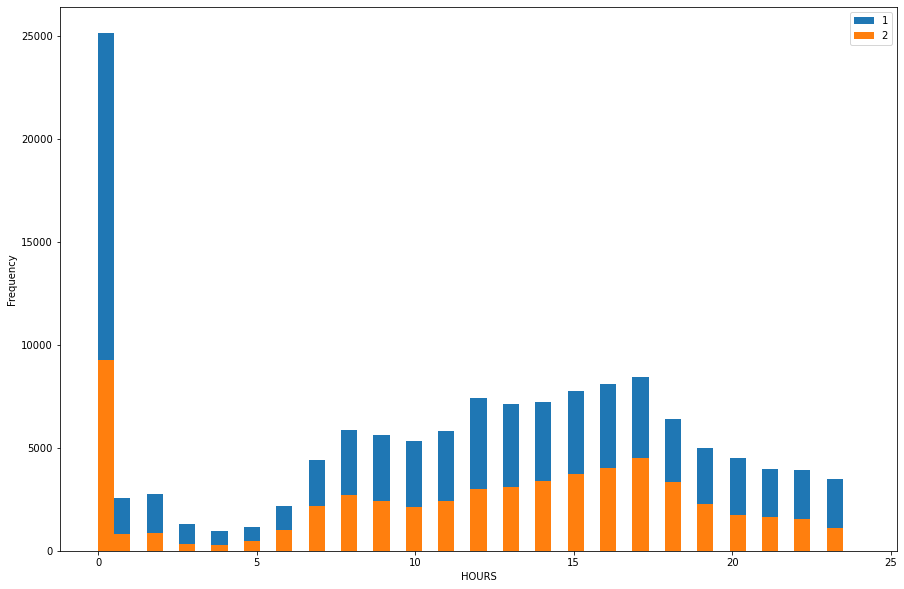

In [28]:
df_pred.groupby('SEVERITYCODE')['HOUR'].plot(kind='hist',bins=np.linspace(0,24,48), figsize=(15,10),
                                            legend=True)
plt.xlabel("HOURS")
plt.show()

<p>this clearly shows that the accident is more likely to occur at 00:00. the percntage of accident is very low from 1:00 to 7:00 and 19:00 to 23:00.</p> <br>
<p>Therefore, create a group with a threshold of 5000 for severity 1<br>
i.e 00:00 and 8:00-18:00 is 1
other is 0</p>

In [29]:
df_pred['HOUR_GP']= df_pred['HOUR'].apply(lambda x: 1 if (x>7 and x<19) or (x==0)  else 0)


In [30]:
df_pred[['HOUR','HOUR_GP']]

,HOUR,HOUR_GP
0,14,1
1,18,1
2,10,1
3,9,1
4,8,1
...,...,...
194668,8,1
194669,9,1
194670,9,1
194671,16,1


In [31]:
df_pred.groupby(['HOUR_GP'])['SEVERITYCODE'].value_counts()

HOUR_GP  SEVERITYCODE
0        1                36182
         2                14270
1        1               100303
         2                43918
Name: SEVERITYCODE, dtype: int64

<BR><BR>

### Now check whether road condition, speeding and light condition

In [32]:
df_pred.groupby(['WEATHER','ROADCOND','LIGHTCOND','SPEEDING'])['SEVERITYCODE'].value_counts().head(50)

WEATHER            ROADCOND    LIGHTCOND                 SPEEDING  SEVERITYCODE
Blowing Sand/Dirt  Dry         Dark - No Street Lights   0         1                   1
                               Dark - Street Lights On   0         2                   5
                                                                   1                   4
                               Dawn                      0         2                   1
                               Daylight                  0         1                  16
                                                                   2                   3
                               Dusk                      0         1                   2
                               Unknown                   0         1                   1
                   Ice         Dark - Street Lights On   0         1                   1
                               Daylight                  0         1                   3
                              

</br>

In [33]:
df_pred.groupby(['SDOT_COLCODE','ST_COLCODE'])['SEVERITYCODE'].value_counts()

SDOT_COLCODE  ST_COLCODE  SEVERITYCODE
0             0           2               80
                          1               25
              1           2               26
                          1                7
              2           2               33
                                          ..
69            45          2               61
                          1                1
              48          2                1
              52          2                4
              53          2                1
Name: SEVERITYCODE, Length: 909, dtype: int64

## Again feature selection

In [34]:
df_pred.dtypes

OBJECTID                   int64
ADDRTYPE                   int64
PERSONCOUNT                int64
PEDCOUNT                   int64
PEDCYLCOUNT                int64
VEHCOUNT                   int64
INCDTTM           datetime64[ns]
SDOT_COLCODE               int64
INATTENTIONIND             int64
UNDERINFL                  int64
WEATHER                   object
ROADCOND                  object
LIGHTCOND                 object
PEDROWNOTGRNT              int64
SPEEDING                   int64
ST_COLCODE                 int64
SEVERITYCODE               int64
DAYOFWEEK                  int64
MONTH                      int64
HOUR                       int64
HOUR_GP                    int64
dtype: object

In [35]:
features= df_pred[['ADDRTYPE','PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT','ST_COLCODE','SDOT_COLCODE','INATTENTIONIND',
                 'UNDERINFL','PEDROWNOTGRNT','SPEEDING','HOUR_GP']].copy(deep=True)

### Use one hot encoding technique to convert categorical varables to binary variables and append them to the feature Data Frame 

In [36]:
features = pd.concat([features,pd.get_dummies(df_pred['WEATHER'])], axis=1)
features.drop(['Unknown','Other'], axis = 1,inplace=True)
features = pd.concat([features,pd.get_dummies(df_pred['ROADCOND'])], axis=1)
features.drop(['Unknown','Other'], axis = 1,inplace=True)
features = pd.concat([features,pd.get_dummies(df_pred['LIGHTCOND'])], axis=1)
features.drop(['Unknown','Other'], axis = 1,inplace=True)
features.head()

,ADDRTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,ST_COLCODE,SDOT_COLCODE,INATTENTIONIND,UNDERINFL,PEDROWNOTGRNT,...,Snow/Slush,Standing Water,Wet,Dark - No Street Lights,Dark - Street Lights Off,Dark - Street Lights On,Dark - Unknown Lighting,Dawn,Daylight,Dusk
0,1,2,0,0,2,10,11,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,0,2,0,0,2,11,16,0,0,0,...,0,0,1,0,0,1,0,0,0,0
2,0,4,0,0,3,32,14,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,3,0,0,3,23,11,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,2,0,0,2,10,11,0,0,0,...,0,0,1,0,0,0,0,0,1,0


### Feature selection

In [37]:
X=features
X[0:5]

,ADDRTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,ST_COLCODE,SDOT_COLCODE,INATTENTIONIND,UNDERINFL,PEDROWNOTGRNT,...,Snow/Slush,Standing Water,Wet,Dark - No Street Lights,Dark - Street Lights Off,Dark - Street Lights On,Dark - Unknown Lighting,Dawn,Daylight,Dusk
0,1,2,0,0,2,10,11,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,0,2,0,0,2,11,16,0,0,0,...,0,0,1,0,0,1,0,0,0,0
2,0,4,0,0,3,32,14,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,3,0,0,3,23,11,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,2,0,0,2,10,11,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [38]:
y=df['SEVERITYCODE'].values
y[:5]

array([2, 1, 1, 1, 2], dtype=int64)

### NORMALIZE DATA

In [39]:
from sklearn import preprocessing

In [40]:
X = preprocessing.StandardScaler().fit(X).transform(X)
X[:1]

array([[ 1.36398593, -0.33020207, -0.18743029, -0.16958841,  0.12553783,
        -0.88333125, -0.41751024, -0.42518348, -0.2217116 , -0.1567239 ,
        -0.22440165,  0.59145941, -0.01696304, -1.21707436, -0.05414257,
         2.45445634, -0.00506801, -0.45298634, -0.011333  , -0.02409974,
        -0.06841713, -1.4099744 , -0.07905204, -0.01813462, -0.01963186,
        -0.07200071, -0.02431221,  1.76085874, -0.08920831, -0.07872239,
        -0.576075  , -0.00751719, -0.1141037 ,  0.77768637, -0.17682024]])

## MODEL CREATION

#### Firstly let's split our data into train and test set

spliting in training and testing set helps us to evaluate the model using unknown data and check the accuracy.

In [41]:
#impoting the useful lib from sklearn.model_selection
from sklearn.model_selection import train_test_split

#### Using only 5000 sample for initial training

In [55]:
x_train , x_test , y_train, y_test = train_test_split(X,y, test_size = 0.2 , random_state=3)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (155738, 35) (155738,)
Test set: (38935, 35) (38935,)


#### so we're using DECISION TREE for model creating and prediction

In [45]:
#firstly let's import the KNN from sklearn
from sklearn.tree import DecisionTreeClassifier

In [46]:
#then, create a model
dt = DecisionTreeClassifier(criterion="entropy")

In [58]:
#after that, fit the values
dt.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [59]:
#now, let's predict
yhat= dt.predict(x_test)

#### scoring the model

In [49]:
from sklearn.metrics import f1_score

In [66]:
f1s = f1_score(y_test,yhat)

In [68]:
print("the f1 score of the dt model is --> ",f1s)

the f1 score of the dt model is -->  0.8310329699996625


### Our model is having a accuracy of 83.1%

#### therefor our model is sucessful and no changes is needed, now we don't want to waste any data, so we'll train the model with test data too

In [69]:
#a whole data training
dt.fit(X,y)

DecisionTreeClassifier(criterion='entropy')

In [71]:
#just for cheking
print("final f1 score of our model is ---->",f1_score(y[200:20000],dt.predict(X[200:20000])))

final f1 score of our model is ----> 0.8636318358402232


## final accuracy ---> 